# GCC118 - Programação Matemática
## Prof. Mayron César de O. Moreira
### Programação Linear: Modelagem Matemática

- *Universidade Federal de Lavras*  
- *Departamento de Ciência da Computação*  

# Problema da empresa *LegoPlus* (Baseado em Cochran, 2015)

A empresa *LegoPlus* é especializada na produção mesas e cadeiras compostas por peças de lego. A *LegoPlus* trabalha com as seguintes matérias-primas: uma peça de dimensões $2\times2$ (peça pequena) e uma outra peça de dimensões $2\times4$ (peça grande). Para a construção de uma mesa, são necessárias $2$ peças pequenas e $2$ peças grandes. Por outro lado, para a fabricação de uma cadeira, são necessárias 2 peças pequenas e uma peça grande. As Figuras 1 e 2 ilustram esses dados. 

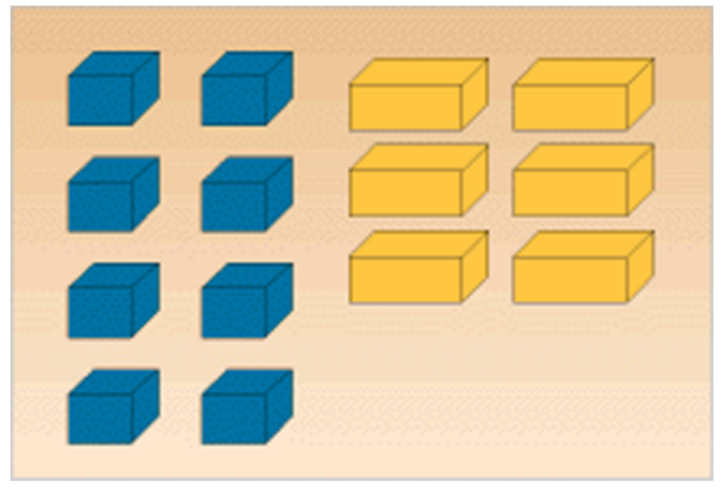

In [1]:
from IPython.display import Image
Image(filename='./images/Lego1.png', width=350, height=350)

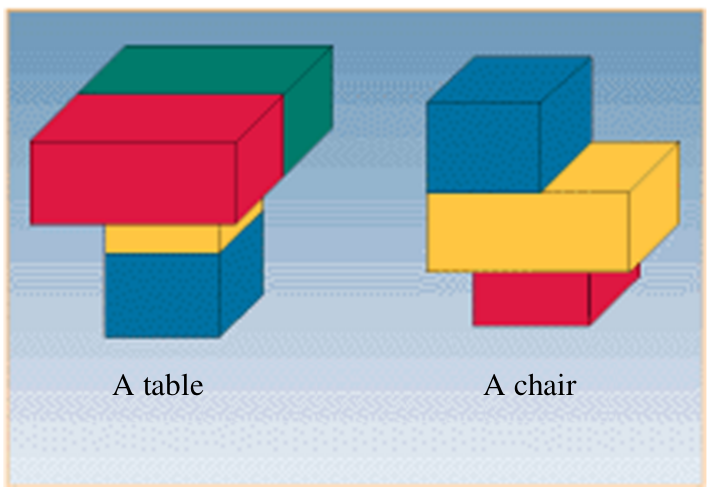

In [2]:
from IPython.display import Image
Image(filename='./images/Lego2.png', width=350, height=350)

O custo de cada peça pequena é calculado em $\$3$, enquanto uma peça grande custa a *LegoPlus* $\$5$. Sabendo que uma mesa e uma cadeira são vendidas a $\$32$ e $\$21$, respectivamente, qual é a quantidade de cada um desses produtos que maximiza o lucro da *LegoPlus*?

## Modelagem matemática

A seguir, apresentaremos a modelagem matemática deste problema, especificando os principais elementos da modelagem de um problema de programação matemática: $(i)$ parâmetros (dados); $(ii)$ variáveis de decisão; $(iii)$ modelagem, composta por uma função objetivo, restrições do problema e restrições de domínio das variáveis de decisão. 

### Parâmetros

- Custo de uma peça pequena: $\$3$;
- Custo de uma peça grande: $\$5$;
- Preço de venda de uma mesa: $\$32$;
- Preço de venda de uma cadeira: $\$21$;
- **Lucro de venda de uma mesa: $\$32 - 2\cdot\$3 - 2\cdot \$5 = \$16$**
- **Lucro de venda de uma cadeira: $\$21 - 2\cdot\$3 - 1\cdot \$5 = \$10$**

### Variáveis

- $x \ge 0$: quantidade de mesas vendidas;
- $y \ge 0$: quantidade de cadeiras.

### Função objetivo

Consiste na **maximização** do lucro da *LegoPlus*, em termos do número de vendas de mesas e cadeiras.

\begin{equation}
\max f(x,y) = 16x + 10y
\end{equation}

### Restrições

- Restrição 1: o número de mesas e cadeiras produzidas deve respeitar a oferta de peças pequenas.
\begin{equation}
2x + 2y \le 8
\end{equation}

- Restrição 2: o número de mesas e cadeiras produzidas deve respeitar a oferta de peças grandes.
\begin{equation}
2x + y \le 6
\end{equation}

### Modelo

\begin{equation}
\max f(x,y) = 16x + 10y
\end{equation}

sujeito a:

\begin{alignat}{2}
2x + 2y \le 8 && \qquad \\
2x + y \le 6 && \qquad \\
x \ge 0, y \ge 0 && \qquad
\end{alignat}

## Implementação em Python

Apresentamos, a seguir, uma sugestão de implementação deste modelo em Python.

### Importação da biblioteca do Gurobi

In [1]:
from gurobipy import *

### Criação do modelo

In [2]:
# Criacao do modelo
m = Model("lego")

Academic license - for non-commercial use only


### Criação das variáveis de decisão

In [3]:
x = m.addVar(vtype=GRB.CONTINUOUS, name="x") # Quantidade de mesas
y = m.addVar(vtype=GRB.CONTINUOUS, name="y") # Quantidade de cadeiras

### Criação da função objetivo

In [4]:
m.setObjective(16 * x + 10 * y, GRB.MAXIMIZE) # Maximizacao do lucro

### Restrição 1: A produção deve respeitar a oferta de peças pequenas

In [5]:
m.addConstr(2 * x + 2 * y <= 8, "Pecas_Peq")

<gurobi.Constr *Awaiting Model Update*>

### Restrição 2: A produção deve respeitar a oferta de peças grandes

In [6]:
m.addConstr(2 * x + y <= 6, "Pecas_Gr")

<gurobi.Constr *Awaiting Model Update*>

### Salva o modelo no formato .lp (importante para conferir se a formulação está implementada corretamente)

In [7]:
m.write('lego.lp')

### Resolve o modelo

In [8]:
m.optimize()

Optimize a model with 2 rows, 2 columns and 4 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+01, 2e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e+00, 8e+00]
Presolve time: 0.03s
Presolved: 2 rows, 2 columns, 4 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.6000000e+31   3.500000e+30   2.600000e+01      0s
       2    5.2000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.08 seconds
Optimal objective  5.200000000e+01


### Imprimindo o valor das variáveis do problema

In [9]:
# Impressao das variaveis do problema, com seus respectivos resultados
for v in m.getVars():
    print('%s: %g' % (v.varName, v.x))

x: 2
y: 2


### Imprime o valor da função objetivo

In [10]:
print('Obj: %g' % m.objVal)

Obj: 52


### Imprime o status da solução obtida.

In [11]:
# Impressao do status da solucao
status = 'Status: '
if m.status == GRB.OPTIMAL:
    status += 'OTIMA'

elif m.status == GRB.INFEASIBLE:
    status += 'INFACTIVEL'

elif m.status == GRB.UNBOUNDED:
    status += 'ILIMITADA'

else:
    status += 'FACTIVEL'

print(status)

Status: OTIMA


## Referências

- James J. Cochran (2015) Extending “Lego® My Simplex”. INFORMS Transactions on Education 15(3):224-231. https://doi.org/10.1287/ited.2015.0139